In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import powerlaw
import seaborn as sns
from slugify import slugify

import pylandstats as pls

sns.set()

In [2]:
URBAN_CLASS_VAL = 1
NONURBAN_CLASS_VAL = 2

# year_codes = ['00', '06', '12', '18']
year_code = '00'
city_slugs = ['basel', 'bern', 'geneve', 'lausanne', 'zurich']
buffer_dists = [5000, 10000, 15000, 20000]

In [5]:
gdf = gpd.read_file('../data/raw/gmb/g1a18.shp')

In [8]:
city_ba_dict = {
    city_slug : pls.BufferAnalysis(
        '../data/processed/agglomeration_extracts/'
        f'{city_slug}/{year_code}/{year_code}.tif',
        base_mask=gdf[gdf['GMDNAME'].apply(slugify) == city_slug]['geometry'],
        buffer_dists=buffer_dists
    )
    for city_slug in city_slugs
}

basel
Scaling range covers a 22.22222222222222% of patches
Scaling range covers a 14.035087719298245% of patches
Scaling range covers a 9.401709401709402% of patches
Scaling range covers a 63.225806451612904% of patches

bern
Scaling range covers a 10.714285714285714% of patches
Scaling range covers a 8.928571428571429% of patches
Scaling range covers a 13.924050632911392% of patches
Scaling range covers a 12.345679012345679% of patches

geneve
Scaling range covers a 46.15384615384615% of patches
Scaling range covers a 14.084507042253522% of patches


Calculating best minimal value for power law fit
/home/martibosch/anaconda3/envs/swiss-urbanization/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Scaling range covers a 38.4% of patches
Scaling range covers a 40.476190476190474% of patches

lausanne
Scaling range covers a 10.344827586206897% of patches
Scaling range covers a 12.280701754385966% of patches
Scaling range covers a 7.042253521126761% of patches
Scaling range covers a 11.842105263157896% of patches

zurich
Scaling range covers a 52.38095238095238% of patches
Scaling range covers a 37.333333333333336% of patches
Scaling range covers a 39.130434782608695% of patches
Scaling range covers a 38.059701492537314% of patches


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


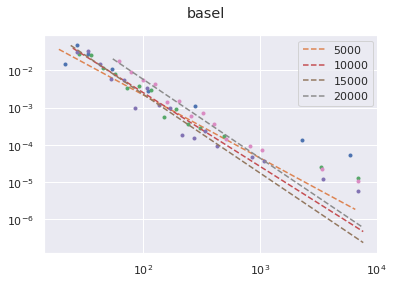

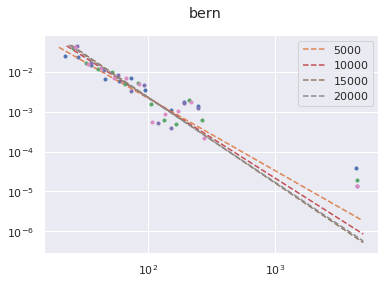

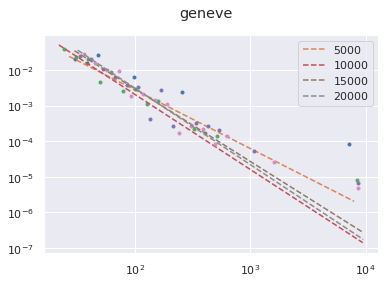

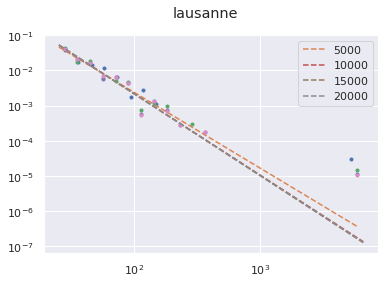

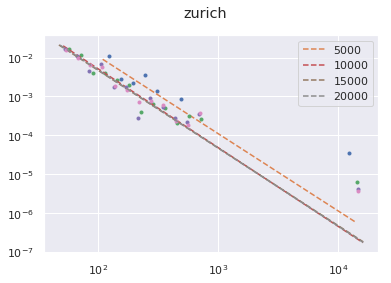

In [18]:
for city_slug in city_ba_dict:
    print(city_slug)
    ba = city_ba_dict[city_slug]
    fig, ax = plt.subplots()
    for buffer_dist, landscape in zip(ba.buffer_dists, ba.landscapes):
        area_ser = landscape.area(URBAN_CLASS_VAL)

        fit = powerlaw.Fit(area_ser.values)

        print("Scaling range covers a {}% of patches".format(
            np.sum(area_ser < fit.xmin) * 100 / len(area_ser)))

        # fit = powerlaw.Fit(area_ser.values, xmin=1)

        fig.suptitle(city_slug)
        fit.plot_pdf(ax=ax, linear_bins=False, linestyle='None', marker='.')
        fit.power_law.plot_pdf(ax=ax, linestyle='--', label=buffer_dist)

    ax.legend()
    print()    

Calculating best minimal value for power law fit
/home/martibosch/anaconda3/envs/swiss-urbanization/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Scaling range covers a 56.72514619883041% of patches
0.12676145958045154
Scaling range covers a 12.345679012345679% of patches
0.1328619853409653
Scaling range covers a 29.38144329896907% of patches
0.09631656470433057
Scaling range covers a 11.842105263157896% of patches
0.16069607879501158
Scaling range covers a 59.85401459854015% of patches
0.15453618062662167


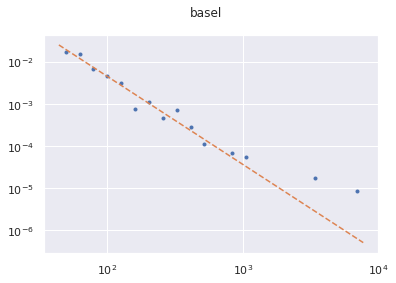

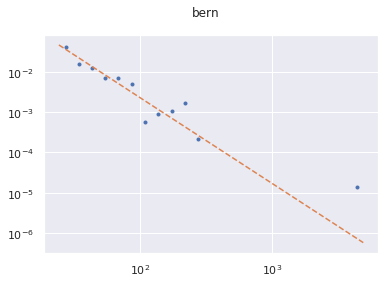

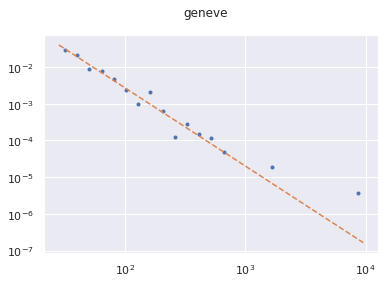

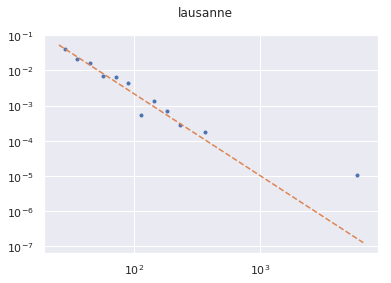

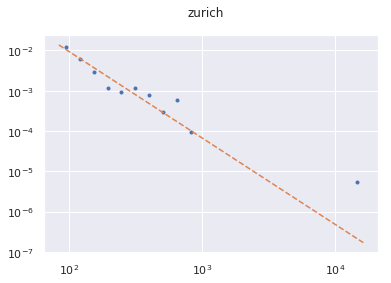

In [55]:
for city_slug in city_ba_dict:
    area_ser = city_ba_dict[city_slug].landscapes[0].area(URBAN_CLASS_VAL)

    fit = powerlaw.Fit(area_ser.values)
    
    print("Scaling range covers a {}% of patches".format(
        np.sum(area_ser < fit.xmin) * 100 / len(area_ser)))
    
    # fit = powerlaw.Fit(area_ser.values, xmin=1)
    print(fit.sigma)

    fig, ax = plt.subplots()
    fig.suptitle(city_slug)
    fit.plot_pdf(ax=ax, linear_bins=False, linestyle='None', marker='.')
    fit.power_law.plot_pdf(ax=ax, linestyle='--')

/home/martibosch/anaconda3/envs/swiss-urbanization/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


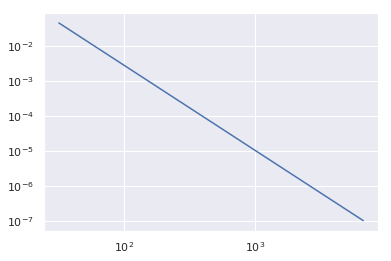

In [11]:
fit.power_law.plot_pdf()

In [22]:
fit.distribution_compare('truncated_power_law', 'lognormal')

(-0.06049206929266093, 0.8719965618046365)

In [12]:
fit.xmin

32.00737720260654

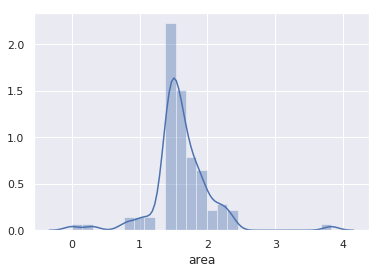

In [15]:
sns.distplot(np.log10(area_ser))

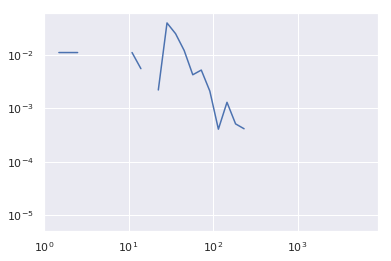

In [8]:
powerlaw.plot_pdf(area_ser)